In [11]:
import numpy as np
import matplotlib.pyplot as plt

class NoisyLIFNeuron:
    def __init__(self, tau, R, threshold, sigma, ur=0, dt=0.01):
        self.tau = tau  # Membrane time constant
        self.R = R      # Membrane resistance
        self.threshold = threshold  # Firing threshold
        self.sigma = sigma #Amplitude of the noise (in units of voltage)
        self.ur = ur    # Rest membrane potential
        self.dt = dt    # Time step
        self.reset()

    def reset(self):
        self.voltage = self.ur  # Rest membrane potential

    def update(self, I, input):
        # Membrane potential update using Euler method
        dv = (-(self.voltage) + self.R * I) / self.tau * self.dt + self.sigma*np.sqrt(self.dt)*np.random.normal(0, 1)+input
        self.voltage += dv
        # Check for spike
        if self.voltage >= self.threshold:
            self.voltage = self.ur  # Reset membrane potential after spike
            return True
        else:
            return False

def simulate_neuron(I, tau, R, threshold, sigma, input, ur=0.01, dt=0.01, duration=10):
    neuron = NoisyLIFNeuron(tau, R, threshold, sigma,ur, dt)
    time = np.arange(0, duration, dt)
    spikes = []
    voltages = []
    for i, t in enumerate(time):
        spike = neuron.update(I,input[i])
        voltages.append(neuron.voltage)
        if spike:
            spikes.append(t)
    return spikes, voltages



def background(dt, t,tau, lambda_, N_background, smooth=False):
    bg = 0
    spikes_bg = []
    for j in range(N_background):
        # Generate Poisson process
        events = np.random.poisson(lambda_ * dt, len(t))
        events[events > 1] = 1  # Ensure at most one event per timestep

        #obtain spike times
        spikes_temp = events*t
        spike_times = spikes_temp[spikes_temp != 0]
        spikes_bg = np.concatenate((spikes_bg,spike_times))
        #presinaptic input
        if smooth:
            for i in range(len(spike_times)):
                bg = bg + (((t-spike_times[i]))/tau)*np.exp(-(t-spike_times[i])/tau)*np.heaviside(t-spike_times[i],0.5)
        else:
            for i in range(len(spike_times)):
                bg = bg + np.exp(-(t-spike_times[i])/tau)*np.heaviside(t-spike_times[i],0.5)
    return bg, spikes_bg


20000
20000


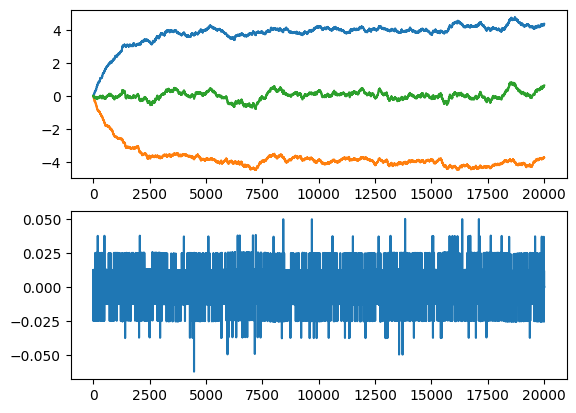

In [12]:
# Simulation parameters
tau = 10 # Membrane time constant (ms)
R = 1    # Membrane resistance
threshold = 1  # Firing threshold
sigma = 0  #NO STOCHASTIC NOISE
ur=0
dt = 0.01 # Time step (ms)
duration = 200  # Duration of simulation (ms)
t=np.arange(0, duration, dt)

I = 0.8  # Input current (arbitrary units)

lambda_hz_e = 160  # Rate of the Poisson process (in Hz) (of each single background neuron)
lambda_e = lambda_hz_e/1e3  # Rate of the Poisson process (events per unit time (spikes/ms))
N_bg_e = 100
w_e = 0.025 #synaptic weight

lambda_hz_i = 160 # Rate of the Poisson process (in Hz)
lambda_i = lambda_hz_i/1e3  # Rate of the Poisson process (events per unit time (spikes/ms))
N_bg_i = 100
w_i = -0.025 #synaptic weight

bg_e, spikes_bg_e = background(dt,t,tau, lambda_e, N_bg_e, smooth=False)
bg_i, spikes_bg_i = background(dt,t, tau, lambda_i, N_bg_i, smooth=False)
bg_tot = w_e*bg_e+w_i*bg_i

plt.figure()
plt.subplot(211)
plt.plot(w_e*bg_e)
plt.plot(w_i*bg_i)
plt.plot(bg_tot)

input = np.diff(bg_tot)
input = np.append(input,0)
plt.subplot(212)
plt.plot(input)

print(len(bg_e))
print(len(input))

spikes, voltages = simulate_neuron(I, tau, R, threshold, sigma, input,ur, dt, duration)
u =  voltages

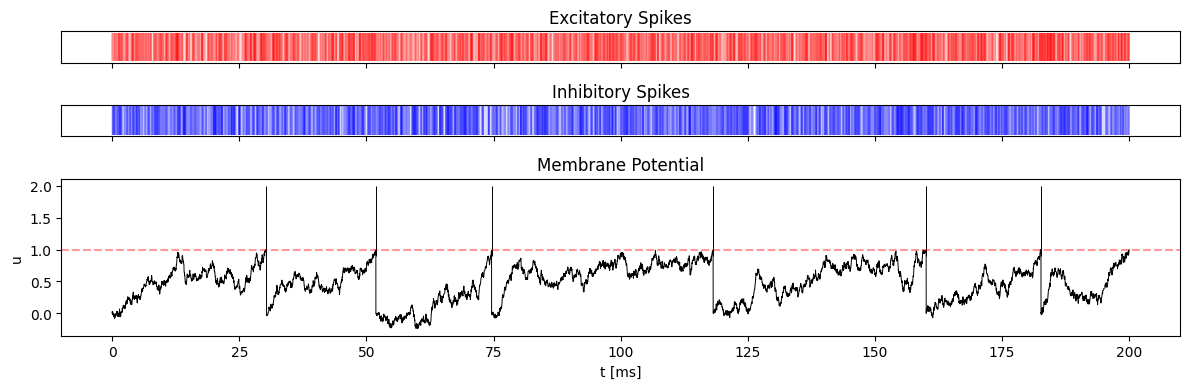

In [13]:
# Create figure and subplots with different aspect ratios
fig, axs = plt.subplots(3, 1, figsize=(12, 4), gridspec_kw={'height_ratios': [1,1, 5]}, sharex=True)

# Plot data on the first subplot
axs[0].vlines(spikes_bg_e, ymin=0, ymax=1, colors='red', linestyles='-', linewidth=0.2)
axs[0].set_title('Excitatory Spikes')
# Hide y ticks and labels of the upper plot
axs[0].tick_params(axis='y', which='both', left=False, labelleft=False)

# Plot data on the first subplot
axs[1].vlines(spikes_bg_i, ymin=0, ymax=1, colors='blue', linestyles='-', linewidth=0.2)
axs[1].set_title('Inhibitory Spikes')
# Hide y ticks and labels of the upper plot
axs[1].tick_params(axis='y', which='both', left=False, labelleft=False)

# Plot data on the second subplot
axs[2].plot(t, u, color = 'black', linewidth = 0.7)
axs[2].vlines(spikes, ymin=0.9, ymax=2, colors= 'black', linestyles='-', linewidth = 0.7)
axs[2].axhline(y=threshold, color='red', linestyle='--', alpha=0.4)
axs[2].set_title('Membrane Potential')
axs[2].set_xlabel('t [ms]')
axs[2].set_ylabel('u')
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
